In [36]:
#http://www.philippsinger.info/notebooks/pl_pymc.html
import sys
import numpy as np
import pymc as mc
from scipy.special import zeta

sys.path.append('../src')
import populations

def _model(data, discrete=True):

    #alpha = mc.Uniform('alpha', 0,6) 
    alpha = mc.Exponential('alpha', 1. / 1.5)
    #xmin = mc.Uniform('xmin', min(simulated), max(simulated), value=min(simulated))
    #xmin = mc.Exponential('xmin', 1.)
    #print xmin.value
    

    @mc.stochastic(observed=True)
    def custom_stochastic(value=data, alpha=alpha, xmin=xmin, discrete=discrete):
        value = value[value >= xmin]
        if discrete == True:
            return np.sum(np.log(value**-alpha / zeta(alpha,xmin)))
        else:
            return np.sum(np.log((alpha-1) * xmin**(alpha-1) * value**-alpha))

    return locals()

In [37]:
def analyze(data, discrete=True, xmin=1.):
    model = mc.MCMC(_model(data,discrete,xmin)) 
    model.sample(5000) 

    print
    print(model.stats()['alpha']['mean'])

    mc.Matplot.plot(model) 

In [38]:
df = populations.startrack_v2_mt_1_all(nrows=10000)
pop = populations.Population(df)

In [39]:
samp = pop.sample_systems(0.5, subset='all', return_df=True)
L = samp['Lx1'].values

In [43]:
import powerlaw

#analyze(simulated, discrete=True)
model = mc.MCMC(_model(L, False)) 
model.sample(5000) 

print
print(model.stats()['alpha']['mean'])

mc.Matplot.plot(model)

NameError: name 'xmin' is not defined

In [17]:
model.stats()

{'alpha': {'n': 5000,
  'standard deviation': 0.016218721702947633,
  'mean': 1.9418617181939022,
  '95% HPD interval': array([1.91919738, 1.97614716]),
  'mc error': 0.0011158356426595073,
  'quantiles': {2.5: 1.9116512130226166,
   25: 1.930241694933212,
   50: 1.9425071429861283,
   75: 1.9526174735016946,
   97.5: 1.9703575372026234}}}

Plotting alpha


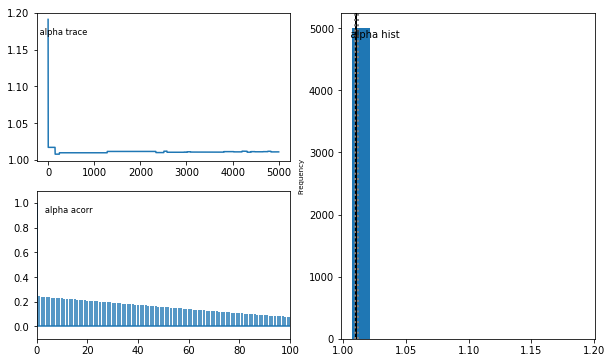

In [41]:
mc.Matplot.plot(model)